In [5]:
using Statistics: mean

import FFTW

using Interact
using PyPlot

In [14]:
@show Lx, Ly = 8, 8;
@show Nx, Ny = 128, 128;
@show Δx, Δy = Lx/Nx, Ly/Ny;
@show x = Δx * (0:(Nx-1));
@show y = Δy * (0:(Ny-1));

(Lx, Ly) = (8, 8) = (8, 8)
(Nx, Ny) = (128, 128) = (128, 128)
(Δx, Δy) = (Lx / Nx, Ly / Ny) = (0.0625, 0.0625)
x = Δx * (0:Nx - 1) = 0.0:0.0625:7.9375
y = Δy * (0:Ny - 1) = 0.0:0.0625:7.9375


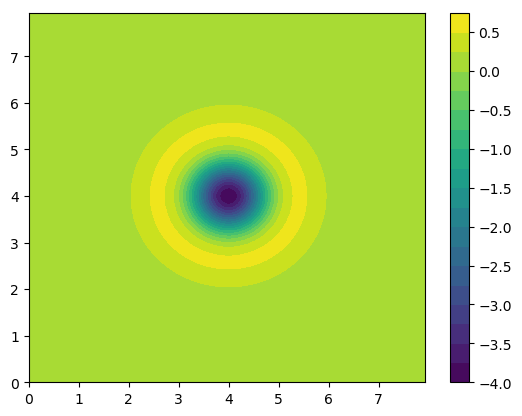

size(f) = (128, 128)
minimum(f) = -4.0
maximum(f) = 0.5413411329464508


In [15]:
# f = @. exp(- 0.1 * ( (x - Lx/2)^2 + (y - Ly/2)'^2));
x′ = @. x - Lx/2;
y′ = @. y - Ly/2;
f = @. 4 * (x′^2 + y′'^2 - 1) * exp(-(x′^2 + y′'^2))
ϕa = @. exp(-(x′^2 + y′'^2))
@show size(f);
@show minimum(f);
@show maximum(f);
PyPlot.contourf(x, y, f, levels=20); PyPlot.colorbar();

In [ ]:
fh = FFTW.rfft(f)

In [ ]:
l = 0:(Nx-1)
m = 0:(Ny-1)
# kx² = @. (4 / Δx^2) * sin(π*l / Nx)^2;
# ky² = @. (4 / Δy^2) * sin(π*m / Ny)^2;
kx² = @. ((2*π / Lx) * l)^2
ky² = @. ((2*π / Ly) * m)^2

In [ ]:
# ϕh = - fh ./ k²[1:Int(Nx/2 + 1), :]; ϕh[1, 1] = 0; ϕh[1, end] = 0; ϕh
ϕh = zeros(Complex{Float64}, size(fh))
for j in 1:Ny, i in 1:Int(Nx/2)
    ϕh[i, j] = - fh[i, j] / (kx²[i] + ky²[j])
end
ϕh[1, 1] = 0; ϕh[1, end] = 0;
ϕh

In [ ]:
ϕs = FFTW.irfft(ϕh, Nx)

In [ ]:
maximum(ϕs) - minimum(ϕs)

In [ ]:
PyPlot.contourf(x, y, ϕs, levels=20); PyPlot.colorbar();

In [ ]:
PyPlot.contourf(Δx * (0:(2*Nx-1)), Δy * (0:(2*Ny-1)), vcat(hcat(ϕs, ϕs), hcat(ϕs, ϕs)) .- minimum(ϕs), levels=20); PyPlot.colorbar();

In [ ]:
fh = FFTW.fft(f)
ϕh = zeros(Complex{Float64}, size(fh))
for j in 1:Ny, i in 1:Ny
    ϕh[i, j] = - fh[i, j] / (kx²[i] + ky²[j])
end
ϕh[1,1] = 0
ϕs = FFTW.ifft(ϕh)
PyPlot.contourf(x, y, ϕs, levels=20); PyPlot.colorbar();

In [7]:
function solve_poisson_2d_pbc(f, Lx, Ly)
    Nx, Ny = size(f)  # Number of grid points (excluding the periodic end point).

    # Forward transform the real-valued source term.
    fh = FFTW.rfft(f)

    # Wavenumbers.
    # l, m = 0:Nx, 0:Ny  # Wavenumber indices.
    # kx² = @. ((2*π / Lx) * l)^2
    # ky² = @. ((2*π / Ly) * m)^2
    # ϕh = - fh ./ k²[1:Int(Nx/2 + 1), :]; ϕh[1, 1] = 0; ϕh[1, end] = 0; ϕh
    
    i1 = 0:Int(Nx/2)
    i2 = Int(-Nx/2+1):-1
    j1 = 0:Int(Ny/2)
    j2 = Int(-Ny/2+1):-1
    kx = reshape((2π/Lx) * cat(i1, i2, dims=1), (Nx, 1))
    ky = reshape((2π/Ly) * cat(j1, j2, dims=1), (1, Ny))
    k² = @. kx^2 + ky^2
    
    ϕh = - fh ./ k²[1:Int(Nx/2 + 1), :]

    # Setting the DC/zero Fourier component to zero.
    ϕh[1, 1] = 0

    # Take the inverse transform of the solution's Fourier coefficients.
    ϕ = FFTW.irfft(ϕh, Nx)
end

solve_poisson_2d_pbc (generic function with 1 method)

minimum(ϕs) = -0.04908752080575006
maximum(ϕs) = 0.950912423196228
minimum(ϕs) = 

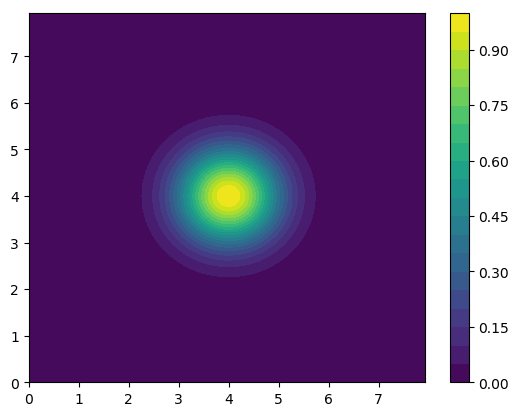

0.0
maximum(ϕs) = 0.9999999440019781


In [16]:
ϕs = solve_poisson_2d_pbc(f, Lx, Ly)
@show minimum(ϕs)
@show maximum(ϕs)
ϕs = ϕs .- minimum(ϕs)
@show minimum(ϕs)
@show maximum(ϕs)
PyPlot.contourf(x, y, ϕs .- minimum(ϕs), levels=20); PyPlot.colorbar();

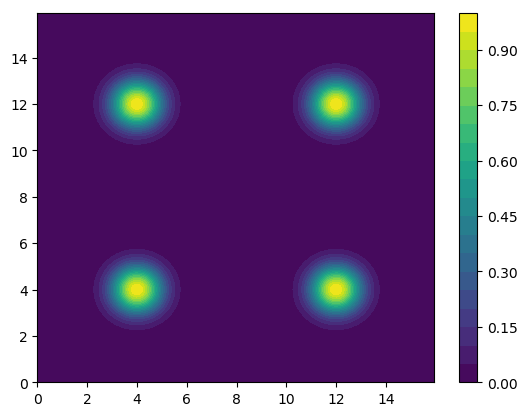

size(x″) = (256,)
size(y″) = (256,)
size(ϕs″) = (256, 256)


In [17]:
x″ = Δx * (0:(2*Nx-1))
y″ = Δy * (0:(2*Ny-1))
ϕs″ = vcat(hcat(ϕs, ϕs), hcat(ϕs, ϕs))
@show size(x″)
@show size(y″)
@show size(ϕs″)
PyPlot.contourf(x″, y″, ϕs″, levels=20); PyPlot.colorbar();

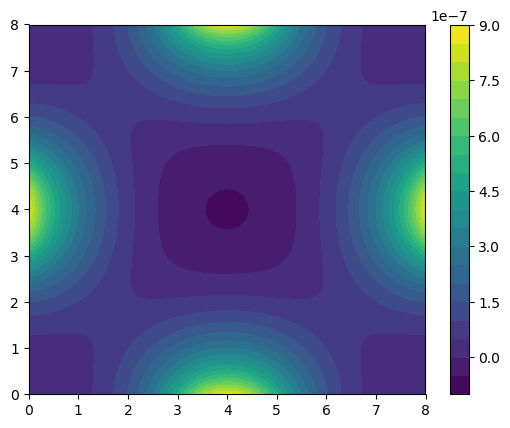

In [40]:
PyPlot.contourf(x, y, ϕs - ϕa, levels=20); PyPlot.colorbar();

In [71]:
Ns = [16] # [32, 64, 128, 256, 512, 1024]
errors = []

for N in Ns
    Lx, Ly = 8, 8;
    Nx, Ny = 2*N, N
    Δx, Δy = Lx/Nx, Ly/Ny;
    x = Δx * (0:(Nx-1));
    y = Δy * (0:(Ny-1));
    
    # Primed coordinates to get a Gaussian centered at (Lx/2, Ly/2).
    x′ = @. x - Lx/2;
    y′ = @. y - Ly/2;
    
    f = @. 4 * (x′^2 + y′'^2 - 1) * exp(-(x′^2 + y′'^2))  # Source term
    f .= f .- mean(f)  # Ensure that source term integrates to zero.
    
    ϕa = @. exp(-(x′^2 + y′'^2))  # Analytic solution

    ϕs = solve_poisson_2d_pbc(f, Lx, Ly)
    
    # Choosing the solution that integrates out to zero.
    # ϕs = ϕs .- minimum(ϕs)
    ϕs = ϕs .+ (1 - maximum(ϕs))

    @show max_error = mean(abs.(ϕs - ϕa))
    append!(errors, max_error)
end

max_error = mean(abs.(ϕs - ϕa)) = 9.046207788369489e-7


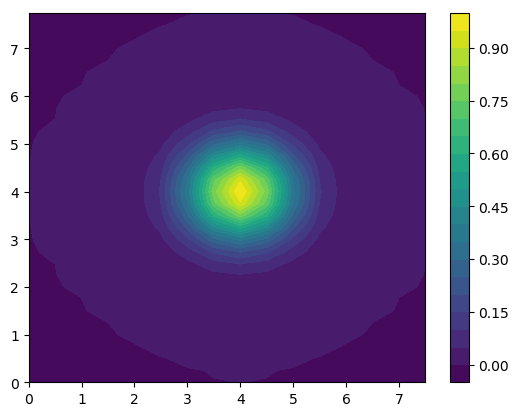

size(x) = (32,)
size(y) = (16,)
size(ϕs) = (32, 16)


In [72]:
@show size(x)
@show size(y)
@show size(ϕs)
PyPlot.contourf(y, x, ϕs, levels=20); PyPlot.colorbar();
# PyPlot.loglog(Ns, errors, linestyle="--", marker="o");

In [52]:
@show minimum(ϕa)
@show maximum(ϕa)
@show minimum(ϕs)
@show maximum(ϕs)
@show 1 - maximum(ϕs)
ϕss = ϕs .+ (1 - maximum(ϕs))
@show minimum(ϕss)
@show maximum(ϕss)

minimum(ϕa) = 1.2664165549094176e-14
maximum(ϕa) = 1.0
minimum(ϕs) = -0.04908751836735869
maximum(ϕs) = 0.9509124267233859
1 - maximum(ϕs) = 0.04908757327661406
minimum(ϕss) = 5.490925537171565e-8
maximum(ϕss) = 1.0


1.0